# Assignment 1: Introduction to the Fully Recurrent Network

*Author:* Thomas Adler

*Copyright statement:* This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for  personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.


## Exercise 1: Numerical stability of the binary cross-entropy loss function

We will use the binary cross-entropy loss function to train our RNN, which is defined as
$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
where $y$ is the label and $\hat y$ is a prediction, which comes from a model (e.g. an RNN) and is usually sigmoid-activated, i.e., we have
$$
\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.
$$
The argument $z$ is called *logit*. For reasons of numerical stability it is better to let the model emit the logit $z$ (instead of the prediction $\hat y$) and incorporate the sigmoid activation into the loss function. Explain why this is the case and how we can gain numerical stability by combining the two functions $L_{\text{BCE}}(\hat y, y)$ and $\sigma(z)$ into one function $L(z, y) = L_{\text{BCE}}(\sigma(z), y)$.

*Hint: Prove that $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ and argue why the right-hand side is numerically more stable. Finally, express $L(z,y)$ in terms of that form.*

########## YOUR SOLUTION HERE ##########


# At first:
 ## why combining the binary cross-entropy loss function $L_{\text{BCE}}(\hat y, y)$with the sigmoid activation $\sigma(z)$ improves numerical stability?
## and why the right-hand side of this equation is numerically more stable?


TO exponentiation of large positive values:
When $z$ is a large positive value, computing $e^{z}$ can lead to numerical overflow, as the exponential function grows rapidly. However, in the right-hand side, we have $e^{-|z|}$, which ensures that the exponential term does not become too large. By computing $e^{-|z|}$ instead of $e^{z}$, we avoid potential overflow issues.
Preventing exponentiation of large negative values:
When $z$ is a large negative value, computing $e^{z}$ can lead to numerical underflow, as the exponential function approaches zero. In the right-hand side, we have $\max(0, z)$, which prevents the exponentiated term from becoming too small. By taking the maximum of $0$ and $z$, we avoid potential underflow issues.
By combining $e^{-|z|}$ and $\max(0, z)$ in the right-hand side, we ensure that the exponential term stays within a reasonable range, preventing numerical instability due to overflow or underflow.



In summary, the right-hand side of the equation $\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$ is numerically more stable because it avoids extreme exponentiation of large positive or negative values, reducing the chances of numerical overflow or underflow.

# We have also to prove that :
$$\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$$

so Let's do it but only for z > 0 :
$$\log(1+e^{z}) = \log (1+e^{-|z|}) + \max(0, z)$$
$$\log(1+e^{z}) = \log (1+e^{-z}) + z$$
by taking dervative of both sides :
$$\frac{e^{z}} {1+ e^{z}} = 1 - \frac {e^{-z}}{1 + e^{-z}}$$
$$\frac{e^{z}} {1+ e^{z}} = \frac{1+ e^{-z}} {1+ e^{-z}} - \frac {e^{-z}}{1 + e^{-z}}$$
$$\frac{e^{z}} {1+ e^{z}} = \frac {1}{1 + e^{-z}}$$

$$\frac{e^{z}} {1+ e^{z}} = \frac{e^{z}} {1+ e^{z}}$$

to prove it if z < 0 also we know that max(o,-z) produce 0 and $-abs(-z) = -z$ so both sides are equal

 # At second:

 ### we Want To Express $L(z,y)$ but before that we will do something to simplify our calculations:

<br>
$$\begin{aligned}
    \log\Big(\frac{1}{1 + e^{-z}}\Big)
    & = \log(1) - \log(1 + e^{-z}) \\
    & = - \log(1 + e^{-z}) \\
\end{aligned}$$


<br>

$$\begin{aligned}
    \log\Big(1 - \frac{1}{1 + e^{-z}}\Big)
    & = \log\Big(\frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}}\Big) \\
    & = \log\Big(\frac{e^{-z}}{1 + e^{-z}}\Big) \\
    & = \log(e^{-z}) - \log(1 + e^{-z}) \\
    & = -z - \log(1 + e^{-z}) \\
\end{aligned}$$

<br>

Rewriting the $L(z,y)$:

$$\begin{aligned}
  L(z,y)
  & = - y \log\Big(\frac{1}{1 + e^{-z}}\Big) - (1 - y) \log\Big(1 - \frac{1}{1 + e^{-z}}\Big)  \\
  & = y \log(1 + e^{-z}) - \log\Big(1 - \frac{1}{1 + e^{-z}}\Big) + y\log\Big(1 - \frac{1}{1 + e^{-z}}\Big) \\
  & = y \log(1 + e^{-z}) + z + \log(1 + e^{-z}) - yz - y\log(1 + e^{-z}) \\
  & = z + \log(1 + e^{-z}) - yz  \\
  & = -yz + \log(e^{z}) + \log(1 + e^{-z}) \\
  & = -yz + \log(e^{z} (1 + e^{-z}) \\
  & = -yz + \log(1 + e^{z}) + \max(0,z)
\end{aligned}$$




## Exercise 2: Derivative of the loss

Calculate the derivative of the binary cross-entropy loss function $L(z, y)$ with respect to the logit $z$.

########## YOUR SOLUTION HERE ##########

$$
L_{\text{BCE}}(\hat y, y) = -y \log \hat y - (1-y) \log (1-\hat y),
$$
we have

$$\hat y = \sigma(z) = \frac{1}{1+e^{-z}}.$$


 we will use partial derivative $$\frac{\partial L}{\partial Z} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial Z}$$
$$\frac{\partial L}{\partial \hat y} = \frac{\partial}{\partial \hat y}(-y \log \hat y - (1-y) \log (1-\hat y))$$
$$=\frac{-y}{\hat y}+\frac{1-y}{1-\hat y}$$
$$\frac{\partial y}{\partial Z}= \frac{-e^{-z}}{(1+e^{-z})^2}$$
we will add -1 and +1 to simplfy
$$\frac{ 1+e^{-z}-1}{(1+e^{-z})^2} = \frac{ 1+e^{-z}}{(1+e^{-z})^2}-\frac{1}{(1+e^{-z})^2}$$
$$$$
$$ = \frac{1}{(1+e^{-z})}(1-\frac{1}{(1+e^{-z}}) = \hat y (1-\hat y)$$
$$$$
$$\frac{\partial L}{\partial Z} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial Z} =\frac{-y}{\hat y}+\frac{1-y}{1-\hat y}  \hat y (1-\hat y)$$
$$$$
$$ = \frac{-y\hat y (1-\hat y)}{\hat y}+\frac{(1-y)\hat y (1-\hat y)}{1-\hat y}$$
$$$$
$$\frac{\partial L}{\partial Z} = \frac{1}{1+e^{-z}} - y $$

## Exercise 3: Initializing the network
Consider the fully recurrent network
$$
s(t) = W x(t) + R a(t-1) \\
a(t) = \tanh(s(t)) \\
z(t) = V a(t) \\
\hat y(t) = \sigma(z(t))
$$
for $t \in \mathbb{N}, x(t) \in \mathbb{R}^{D}, s(t) \in \mathbb{R}^{I}, a(t) \in \mathbb{R}^{I}, z(t) \in \mathbb{R}^K, \hat y(t) \in \mathbb{R}^K$ and $W, R, V$ are real matrices of appropriate sizes and $\hat a(0) = 0$.

*Compared to the lecture notes we choose $f(x) = \tanh(x) = (e^x - e^{-x})(e^x + e^{-x})^{-1}$ and $\varphi(x) = \sigma(x) = (1+e^{-x})^{-1}$. Further, we introduced an auxiliary variable $z(t)$ and transposed the weight matrices.*

Write a function `init` that takes a `model` and integers $D, I, K$ as arguments and stores the matrices $W, R, V$ as members `model.W`, `model.R`, `model.V`, respectively. The matrices should be `numpy` arrays of appropriate sizes and filled with random values that are uniformly distributed between -0.01 and 0.01.

In [1]:
%matplotlib inline
import numpy as np
from scipy.special import expit as sigmoid

class Obj(object):
    pass


model = Obj()
T, D, I, K = 10, 3, 5, 1


def init(model, D, I, K):
  ######### YOUR SOLUTION HERE ##########

    # Set the dimensions of the model
    model.D = D
    model.I = I
    model.K = K

    # Initialize weight matrices with random values within a specified range
    model.W = np.random.uniform(low=-0.01, high=0.01, size=(D, I))
    model.R = np.random.uniform(low=-0.01, high=0.01, size=(I, I))
    model.V = np.random.uniform(low=-0.01, high=0.01, size=(I, K))

# Add the initialization function to the "Obj" class
Obj.init = init

model.init(D, I, K)


In [3]:
print("model.W:\n", model.W)
print("model.W_shape :",model.W.shape)
print("-" *70)
print("model.R:\n", model.R)
print("model.R_shape :",model.R.shape)
print("-" *70)
print("model.V:\n", model.V)
print("model.V_shape :",model.V.shape)


model.W:
 [[ 0.0039104   0.0026591  -0.00672648  0.00972779  0.00379617]
 [-0.00210544 -0.0083572   0.00150891 -0.00792249  0.00409607]
 [ 0.00704423 -0.00853252 -0.00015432  0.00945052  0.00809406]]
model.W_shape : (3, 5)
----------------------------------------------------------------------
model.R:
 [[ 0.00901452  0.00297783  0.00070973  0.0092939   0.00536414]
 [ 0.00693671 -0.00161059 -0.00302366 -0.00669048 -0.00689187]
 [-0.0047653   0.00406587  0.0069856  -0.00223079  0.00699299]
 [-0.00377585  0.00761288  0.00337973 -0.00105792  0.00096371]
 [ 0.00019666  0.00689906  0.00581008 -0.00749897  0.00757644]]
model.R_shape : (5, 5)
----------------------------------------------------------------------
model.V:
 [[ 0.0003422 ]
 [-0.0017633 ]
 [-0.00455767]
 [-0.00876472]
 [ 0.00574762]]
model.V_shape : (5, 1)


## Exercise 4: The forward pass
Implement the forward pass for the fully recurrent network for sequence classification (many-to-one mapping). To this end, write a function `forward` that takes a `model`, a sequence of input vectors `x`, and a label `y` as arguments. The inputs will be represented as a `numpy` array of shape `(T, D)`. It should execute the behavior of the fully recurrent network and evaluate the (numerically stabilized) binary cross-entropy loss at the end of the sequence and return the resulting loss value. Store the sequence of hidden activations $(a(t))_{t=1}^T$ and the logit $z(T)$ into `model.a` and `model.z`, respectively.

In [4]:
def forward(model, x, y):

    # Set the length of the sequence
    model.T = x.shape[0]
    model.x = x
    model.y = y

    # Initialize activation vectors a and prediction vectors z
    model.a = np.zeros((model.T + 1, model.I))
    model.z = np.zeros((model.T, model.K))


    for t in range(model.T):

        # Calculate the total input to the hidden layer (s)
        s = model.W.T @ model.x[t] + model.R.T @ model.a[t-1]

        # Apply (tanh) activation function to the hidden layer
        model.a[t] = (np.exp(s) - np.exp(-s)) / (np.exp(s) + np.exp(s))

        # output of the model
        model.z[t] = model.V.T @ model.a[t]


    binary_cross_entropy_loss = np.sum(np.maximum(model.z[t], 0) - y * model.z[t] + np.log(1 + np.exp(-np.abs(model.z[t]))))

    return binary_cross_entropy_loss

Obj.forward = forward

model.forward(np.random.uniform(-1, 1, (T, D)), 1)


0.693174160178928

## Exercise 5: The computational graph

Visualize the computational graph of the fully recurrent network unfolded in time. The graph should show the functional dependencies of the nodes $x(t), a(t), z(t), L(z(t), y(t))$ for $t \in \{1, 2, 3\}$. Use the package `networkx` in combination with `matplotlib` to draw a directed graph with labelled nodes and edges. If you need help take a look at [this guide](https://networkx.guide/visualization/basics/). Make sure to arrange the nodes in a meaningful way.

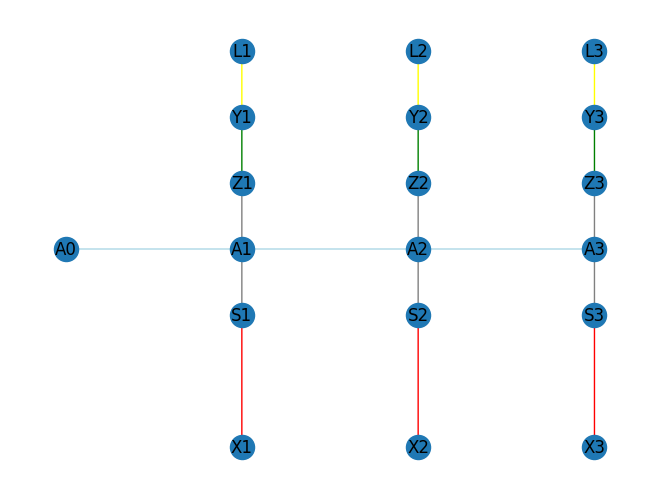

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_node('A0', pos=(0, 1.5))  # Add a node 'Y0' with a position (0, 2)
for i in range(1, 4):
    G.add_node(f'X{i}', pos=(i, 0))
    G.add_node(f'S{i}', pos=(i, 1))
    G.add_node(f'A{i}', pos=(i, 1.5))
    G.add_node(f'Z{i}', pos=(i, 2))
    G.add_node(f'Y{i}', pos=(i, 2.5))
    G.add_node(f'L{i}', pos=(i, 3))

# Add edges to the graph
G.add_edge('A0', 'A1', color='lightblue')  # Add an edge from 'Y0' to 'S1'
for i in range(1, 4):
    G.add_edge(f'X{i}', f'S{i}', color='red')  # Add edges with 'X' and 'S' nodes, colored in 'red'
    G.add_edge(f'S{i}', f'A{i}', color='gray')
    G.add_edge(f'A{i}', f'Z{i}', color='gray')
    G.add_edge(f'Z{i}', f'Y{i}', color='green')
    G.add_edge(f'Y{i}', f'L{i}', color='yellow')
    if i + 1 == 4:
        break
    G.add_edge(f'A{i}', f'A{i+1}', color='lightblue')  # Add an edge from 'Y' to 'S' with the color 'lightblue'

# Get edge colors from the graph
colors = nx.get_edge_attributes(G, 'color').values()

# Get node positions from the graph
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
nx.draw(G, pos, edge_color=colors, arrows=True, with_labels=True)

plt.show()
